In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## 1. The LASSO and Boosting for Regression
## (a) Download the Communities and Crime data. Use the first 1495 rows of data as the training set and the rest as the test set.

In [0]:
fileName1 = 'https://raw.githubusercontent.com/seongohr/ML/master/communities.names'
columnNameDf = pd.read_csv(fileName1, sep = ' ', index_col=None, header=None, skiprows=75, usecols=[1], nrows=128)

fileName2 = 'https://raw.githubusercontent.com/seongohr/ML/master/communities.data'
#columnsName = columnNameDf[1].values.tolist()



In [0]:
#df = pd.read_csv(fileName2, delimiter = ',', index_col=None, header=None, names=columnNameDf[1], na_values=['?'])
#df_x = df.drop(['state','county','community','communityname','fold', 'ViolentCrimesPerPop'], axis=1) # total predictors
#x_columns = df_x.columns.tolist()
#df_y = df.loc[:,'ViolentCrimesPerPop']#total target

train_df = pd.read_csv(fileName2, delimiter = ',', index_col=None, header=None, names=columnNameDf[1], na_values=['?'], nrows=1495)
train_df = train_df.drop(['state','county','community','communityname','fold'], axis=1)
train_x = train_df.drop(['ViolentCrimesPerPop'], axis=1)
train_y = train_df.loc[:,'ViolentCrimesPerPop']

test_df = pd.read_csv(fileName2, delimiter = ',', index_col=None, header=None, names=columnNameDf[1], na_values=['?'], skiprows=1495)
test_df = test_df.drop(['state','county','community','communityname','fold'], axis=1)
test_x = test_df.drop(['ViolentCrimesPerPop'], axis=1)
test_y = test_df.loc[:,'ViolentCrimesPerPop']


In [73]:
print('train data :\n', train_x.describe())
print('train target data :\n', train_y.describe())
print('test data :\n', test_x.describe())
print('test target data :\n', test_y.describe())

train data :
         population  householdsize  ...  LemasPctOfficDrugUn  PolicBudgPerPop
count  1495.000000    1495.000000  ...          1495.000000       239.000000
mean      0.058167       0.461732  ...             0.093304         0.190753
std       0.130359       0.164284  ...             0.238201         0.155815
min       0.000000       0.000000  ...             0.000000         0.000000
25%       0.010000       0.350000  ...             0.000000         0.110000
50%       0.020000       0.430000  ...             0.000000         0.150000
75%       0.050000       0.540000  ...             0.000000         0.220000
max       1.000000       1.000000  ...             1.000000         1.000000

[8 rows x 122 columns]
train target data :
 count    1495.000000
mean        0.240609
std         0.237699
min         0.000000
25%         0.070000
50%         0.150000
75%         0.335000
max         1.000000
Name: ViolentCrimesPerPop, dtype: float64
test data :
        population  househ

## (b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

In [74]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

train_column = columnNameDf.loc[5:126,1].tolist()
imp = IterativeImputer(max_iter=10, imputation_order='ascending', 
                 initial_strategy='mean', max_value=0, min_value=1,
                 n_nearest_features=None,random_state=0, 
                 sample_posterior=False, tol=0.001, verbose=0)
train_x = imp.fit_transform(train_x)
test_x = imp.fit_transform(test_x)

train_x = pd.DataFrame(train_x, columns=train_column)
test_x = pd.DataFrame(test_x, columns=train_column)
print('missing value in training data? : ', train_x.isnull().values.any())
print('missing value in test data? : ', test_x.isnull().values.any())

print('train x \n', train_x)
print('test x \n', test_x)


missing value in training data? :  False
missing value in test data? :  False
train x 
       population  householdsize  ...  LemasPctOfficDrugUn  PolicBudgPerPop
0           0.19           0.33  ...                 0.32             0.14
1           0.00           0.16  ...                 0.00             1.00
2           0.00           0.42  ...                 0.00             1.00
3           0.04           0.77  ...                 0.00             1.00
4           0.01           0.55  ...                 0.00             1.00
5           0.02           0.28  ...                 0.00             1.00
6           0.01           0.39  ...                 0.00             1.00
7           0.01           0.74  ...                 0.00             1.00
8           0.03           0.34  ...                 0.00             1.00
9           0.01           0.40  ...                 0.00             1.00
10          0.13           0.71  ...                 0.00             1.00
11          

In [0]:
temp_x = train_x.copy()
temp_x['ViolentCrimesPerPop'] = train_y

## (C) Plot a correlation matrix for the featues in the data set.

In [76]:
#imp_train.columns = columnNameDf.loc[5:,1].tolist()

#print(imp_train)

corr = train_x.corr()
corr.style.background_gradient(cmap='coolwarm')


## (d) Calculate the Coefficient of Variation CV for each feature, where CV = s/m, in while s is sample standard deviation and m is sample mean. 

In [0]:
#cv_df = pd.DataFrame(columns=columnNameDf.loc[5:,1])
cv_list = []
stds = []
means = []
total = []

sample_length = len(train_x)-1 #n-1
#print('sample_length:', sample_length)

for col in train_x.columns:
  # sample mean
  sample_sum = train_x[col].sum()
  sample_mean = sample_sum/sample_length
  means.append(sample_mean)
  
  col_mean = train_x[col].mean()
  train_column
  # sample stadard deviation
  sq_sample_deviation = 0
  for i in range(len(train_x)):
    sq_sample_deviation += np.square((train_x.loc[i,col] - col_mean))
  sample_std = sq_sample_deviation/sample_length
  stds.append(sample_std)
  
  cv_list.append((sample_std/sample_mean))
  
total.append(means)
total.append(stds)
total.append(cv_list)
total_df = pd.DataFrame(total, columns=columnNameDf.loc[5:126,1].tolist())
total_df = total_df.set_index([pd.Index(['sample mean', 'sample std', 'cv'])])

In [78]:
total_df

population  householdsize  ...  LemasPctOfficDrugUn  PolicBudgPerPop
sample mean    0.058206       0.462041  ...             0.093367         0.866526
sample std     0.016993       0.026989  ...             0.056740         0.095334
cv             0.291952       0.058413  ...             0.607707         0.110019

[3 rows x 122 columns]

## (e) Pick [128^(1/2)] features with highest CV, and make scattr plots and box plots for them. Can you draw conclusions about significane of those features, just by the scatter plots?

### Answer :  No, it's hard to recognize obvious patterns in scatter plots so I cannot draw conclusions.

In [79]:
total_df = total_df.sort_values(by='cv', axis=1, ascending=False)
total_df

PolicPerPop  ...  LemasSwFTFieldOps
sample mean     0.135442  ...           0.987744
sample std      0.094042  ...           0.004369
cv              0.694333  ...           0.004424

[3 rows x 122 columns]

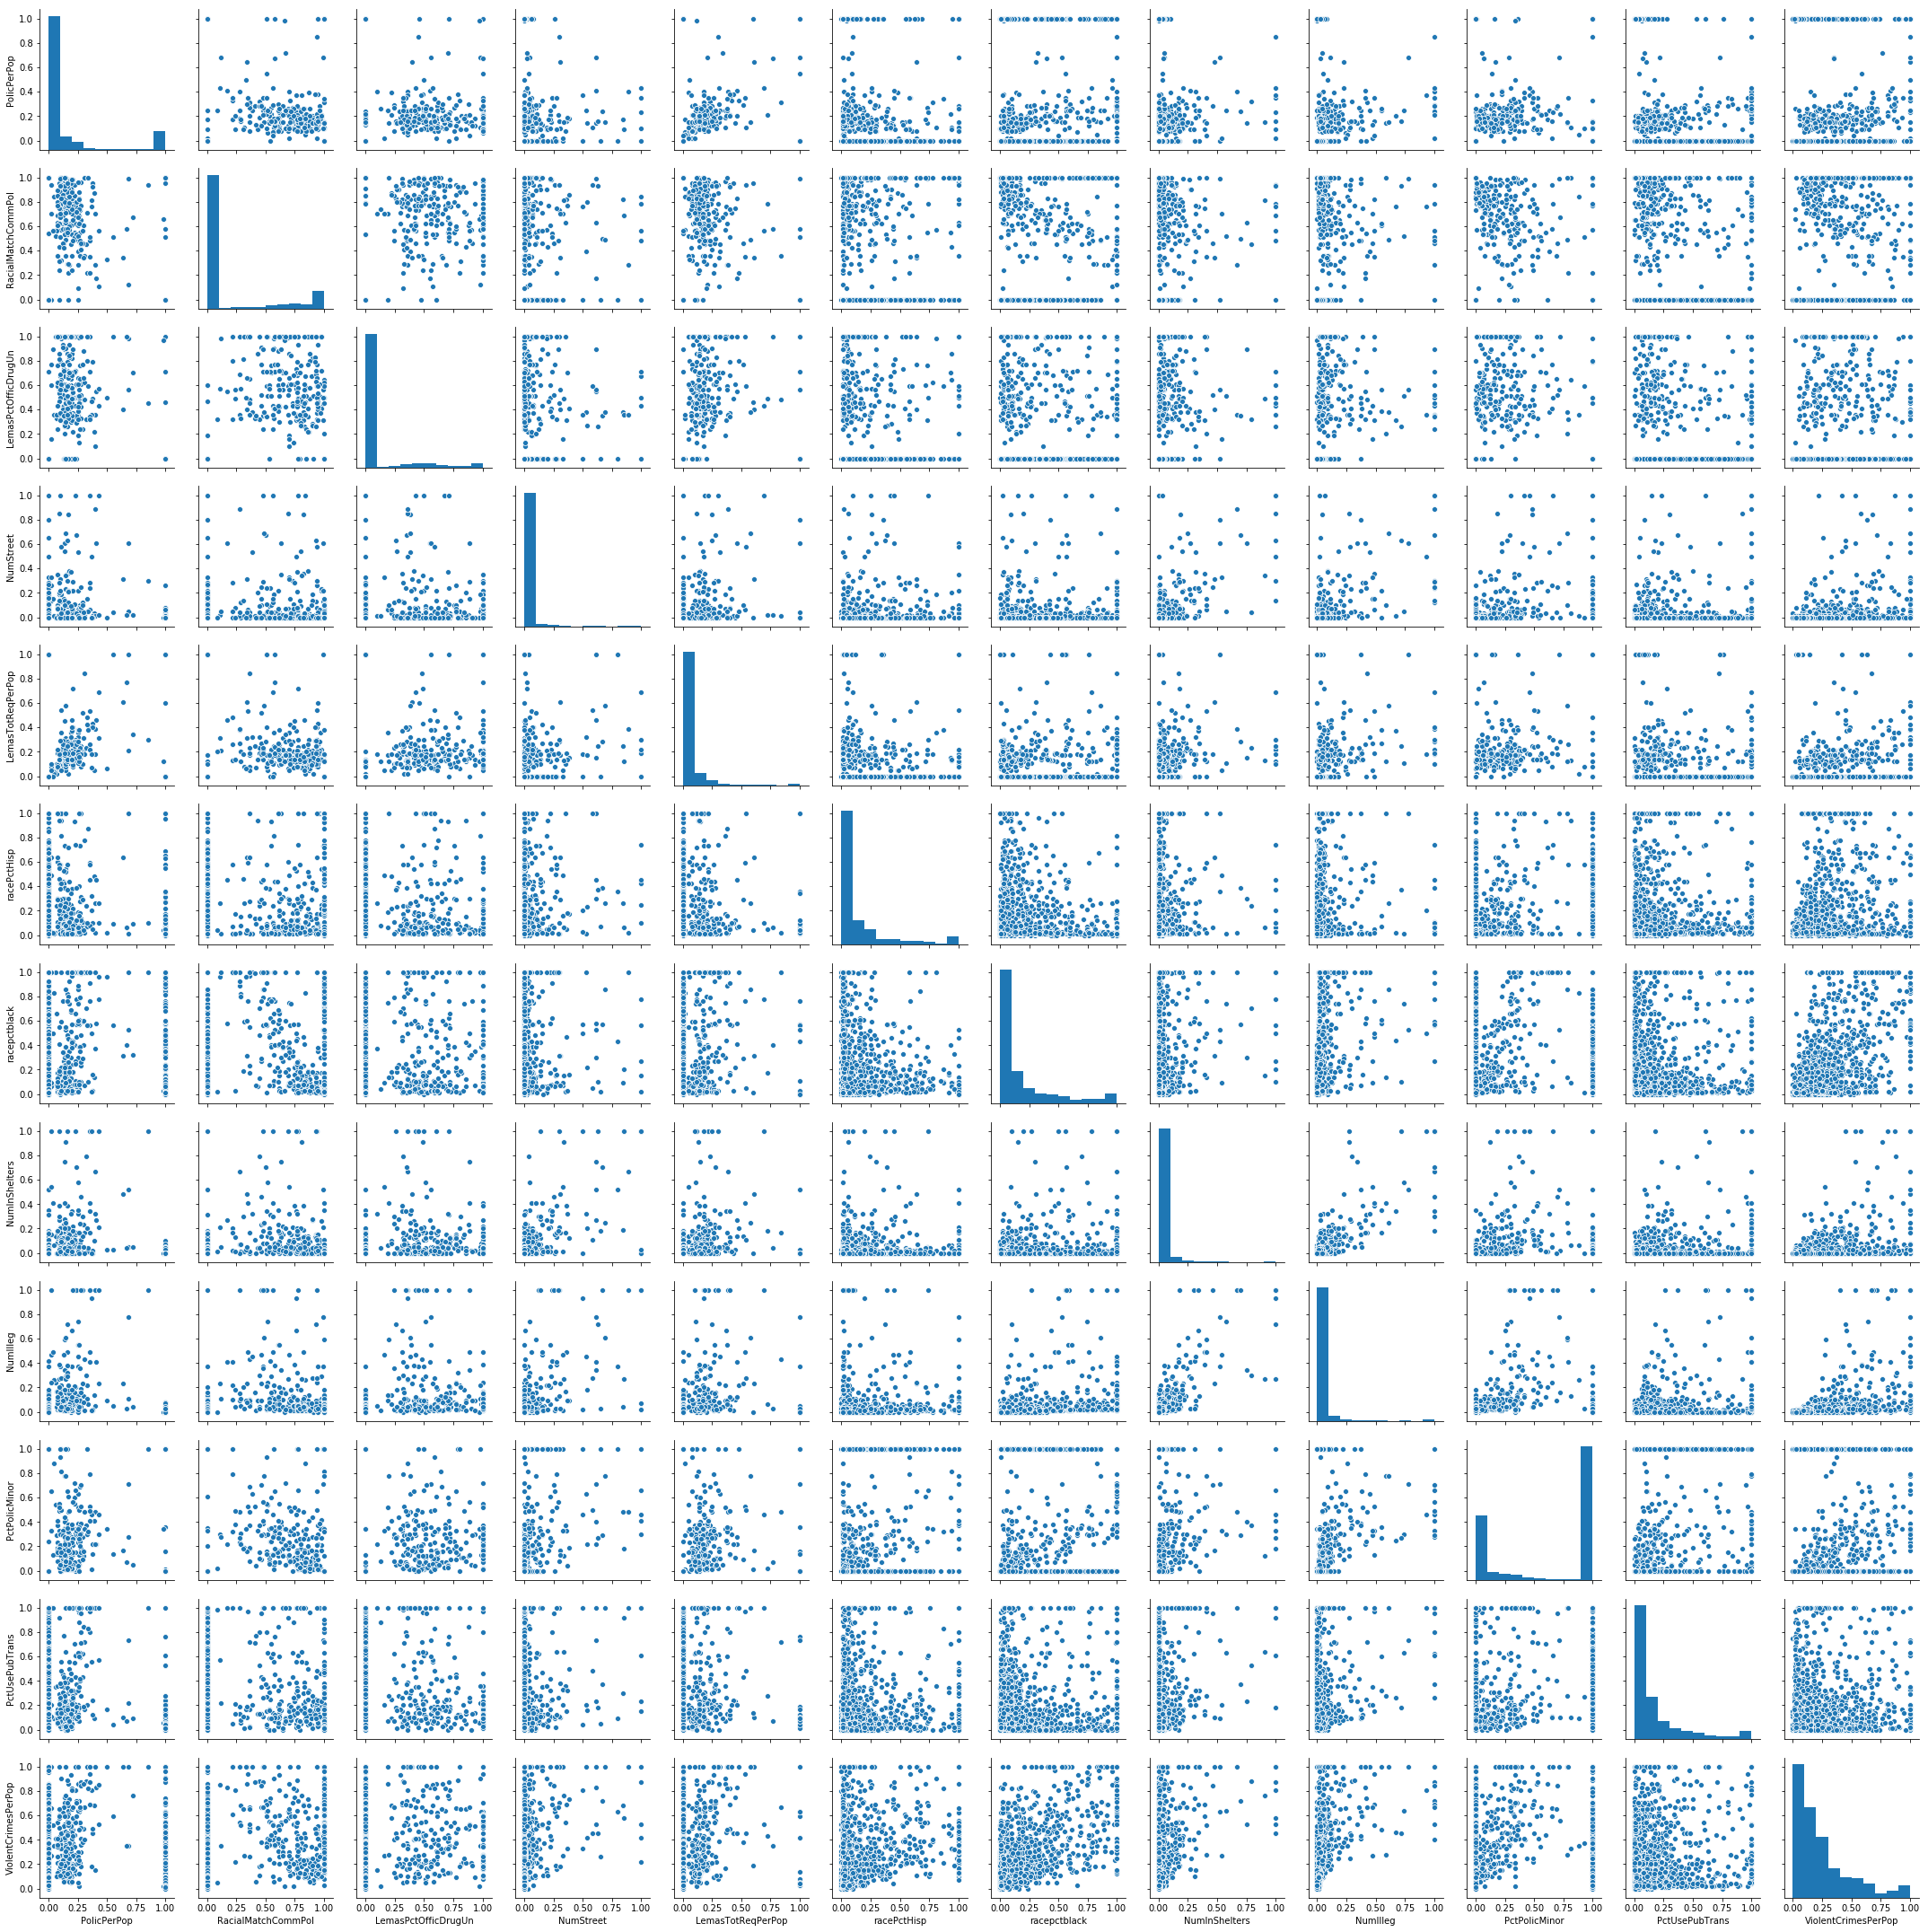

In [80]:
import math

#total_df.columns[0:sqrt(128)].tolist()
vars_name = total_df.columns[0:int(math.sqrt(128))].tolist()
vars_name.append('ViolentCrimesPerPop')
sc_plot = sns.pairplot(temp_x, vars=vars_name)


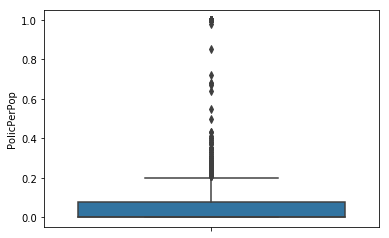

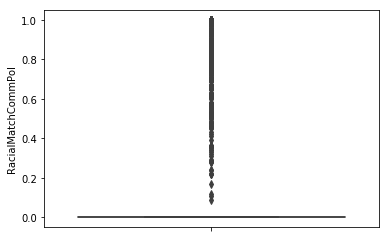

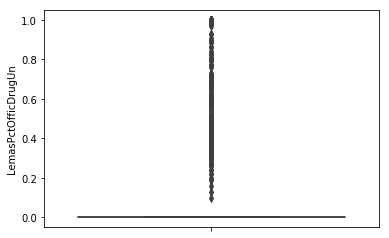

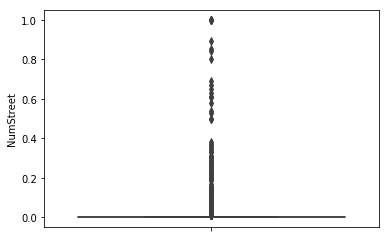

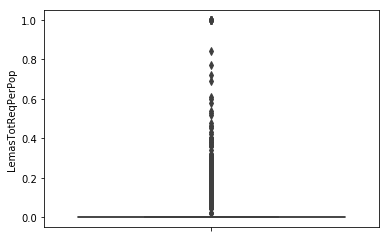

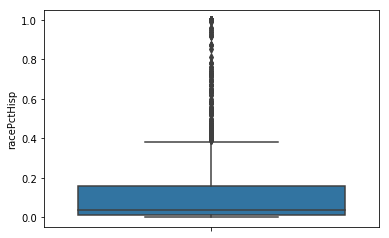

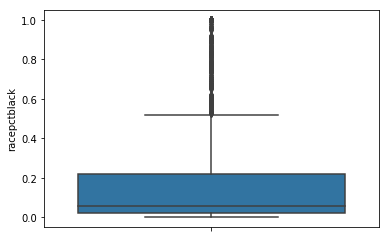

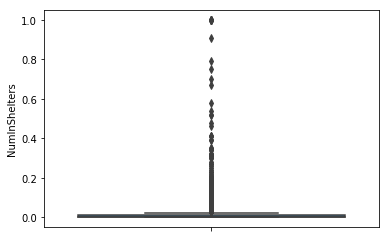

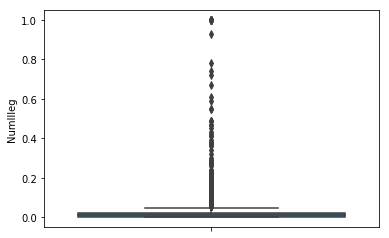

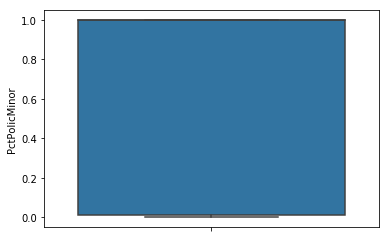

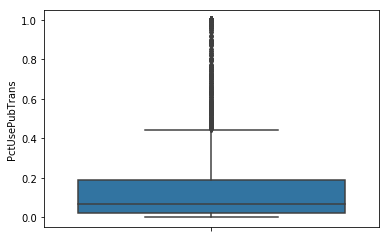

In [81]:
for i in range(len(vars_name)-1):
    col = vars_name[i]
    bPlot = sns.boxplot(y = col, data = train_x)
    plt.show()

## (f) Fit a linear model using least squares to the training set and report the test error.

In [82]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x, train_y)
test_predict = reg.predict(test_x)
error = mean_squared_error(test_y, test_predict)
#error = 1-reg.score(test_x, test_y)
print('test error : ', error)

test error :  0.02287616923783139


## (g) Fit a ridge regression model on the training set, with lambda chosen by cross-validation. Report the test error obrained.

In [83]:
from sklearn.linear_model import RidgeCV

rcv = RidgeCV(cv=10).fit(train_x, train_y)
test_predict = rcv.predict(test_x)
error = mean_squared_error(test_y, test_predict)
print('regularization parameter lambda : ', rcv.alpha_)
print('test error : ', error)

regularization parameter lambda :  1.0
test error :  0.02024432769364728


## (h) Fit a LASSO model on the training set, with lambda chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized features. Report the test error for both cases and compare them.

In [84]:
from sklearn.linear_model import LassoCV

lcv = LassoCV(cv=10, random_state=0, tol=0.001).fit(train_x, train_y)
test_predict = lcv.predict(test_x)
error = mean_squared_error(test_y, test_predict)
coefficients = lcv.coef_
lambda_ = lcv.alpha_
print('regularization parameter lambda : ', lambda_)
print('test error : ', error)

vars=[]
for i in range(len(coefficients)):
  if coefficients[i] != 0:
    vars.append(train_column[i])
print('number of variables selected : ', len(vars))
print('variables selected : ', vars)

regularization parameter lambda :  0.00011614723626829846
test error :  0.019221245576917106
number of variables selected :  84
variables selected :  ['racepctblack', 'racePctWhite', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'agePct65up', 'numbUrban', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctBSorMore', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec8', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'Pct

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x_st = scaler.fit_transform(train_x)
test_x_st = scaler.fit_transform(test_x)
lcv_st = LassoCV(cv=10, random_state=0, tol=0.001).fit(train_x_st, train_y)
test_predict = lcv_st.predict(test_x_st)
error_st = mean_squared_error(test_y, test_predict)
coefficients_st = lcv_st.coef_
lambda_st = lcv_st.alpha_
print('regularization parameter lambda : ', lambda_st)
print('test error : ', error_st)

vars_st=[]
for i in range(len(coefficients_st)):
  if coefficients_st[i] != 0:
    vars_st.append(train_column[i])
print('number of variables selected : ', len(vars_st))
print('variables selected : ', vars_st)




regularization parameter lambda :  0.0006189604623293166
test error :  0.017990729983128586
number of variables selected :  83
variables selected :  ['population', 'racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'agePct65up', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone'

In [86]:
lcv_result = pd.DataFrame([[error, lambda_, len(vars)], [error_st, lambda_st, len(vars_st)]], columns=['test error', 'regularization parameter', 'number of variables selected'])
lcv_result = lcv_result.set_index([pd.Index(['LASSO', 'LASSO with standardization'])])
lcv_result

test error  ...  number of variables selected
LASSO                         0.019221  ...                            84
LASSO with standardization    0.017991  ...                            83

[2 rows x 3 columns]

## Answer : Test error in standardized model is a little bit smaller than the one without standardization but the difference was about 0.2% and it's not a big difference. This difference might comes from the different number of variables selected in each model.

## (i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.


M :  94


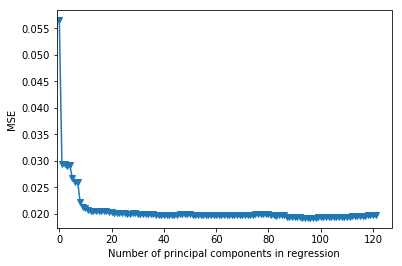

In [87]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
pca = PCA()

# scale the data
x_reduced_train = pca.fit_transform(scale(train_x))
n = len(x_reduced_train)

# 10-fold cv, with shuffle
kf_10= model_selection.KFold(n_splits=10, shuffle=True, random_state=1)
mse = []

# calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), train_y.ravel()
                            , cv=kf_10, scoring='neg_mean_squared_error').mean()
mse.append(score)

# calculate mse using cv for the 19 principle components, adding one component at the time
#for i in np.arange(1,20):
for i in np.arange(1,len(train_column)):
  score = -1*model_selection.cross_val_score(regr, x_reduced_train[:,:i],
                                            train_y.ravel(), cv=kf_10,
                                            scoring='neg_mean_squared_error').mean()
  mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
#plt.title('')
plt.xlim(left=-1)

num_m = np.where(mse==np.array(mse).min())

print('M : ',num_m[0][0])

In [88]:
x_reduced_test = pca.transform(scale(test_x))[:,:num_m[0][0]]

# train regression model on training data
regr.fit(x_reduced_train[:,:num_m[0][0]], train_y)

# prediction of test data
pred = regr.predict(x_reduced_test)
pca_error = mean_squared_error(test_y,pred)

print('test error : ', pca_error)

test error :  0.01935223151422159


## (j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1-penalized gradient boosting tree. You can use XGBoost to fit the model tree. Determine alpha (the regularization term) using cross-validation.

In [89]:
!pip install xgboost
!pip install --upgrade xgboost

Requirement already up-to-date: xgboost in /usr/local/lib/python3.6/dist-packages (0.90)


In [90]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_test = {'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}

gsearch = GridSearchCV(estimator = XGBRegressor( reg_lambda=0, random=0), 
param_grid = param_test, scoring='neg_mean_squared_error',iid=False, cv=5)
gsearch.fit(train_x,train_y)
gsearch.best_params_, gsearch.best_score_

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:17:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:17:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:17:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:17:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:17:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:17:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:17:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:17:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:17:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:17:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:17:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:17:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:17:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:17:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:17:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:17:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:17:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:17:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:17:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:17:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:17:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:17:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:17:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:17:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:17:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[05:17:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'reg_alpha': 1}, -0.019936008131535017)

In [91]:
print(gsearch.best_params_)
print('test error : ', abs(gsearch.best_score_))

{'reg_alpha': 1}
test error :  0.019936008131535017
